# Verify the interaction of equality and inequality constraints

In [1]:
%matplotlib widget

In [2]:
import os, importlib, inspect
from IPython.display import display, Math, Latex, Markdown
from bmcs_matmod.gsm.gsm_models.gsm1d_ved import GSM1D_VED
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gsm = GSM1D_VED(k_max=20)

In [4]:
mparams = dict(E = 20, K = 5, S = 2, c = 1, r = 1, eps_0 = 1, f_c = 15, eta_vp=10, eta_ve=100)
n_t = 10
n_I = 1
eps_max = 4
t_t = np.linspace(0, 100, n_t)
eps_n_t = np.linspace(0, eps_max, n_t)
t_t, eps_ta, sig_ta, Eps_t, Sig_t, iter_t, lam_t, (d_t_t, d_eps_ta) = gsm.get_response(eps_n_t, t_t, **mparams )
# Plot viscoplastic strain and damage along time
eps_t = eps_ta[:, 0]
eps_v_t = Eps_t[:, 0, 0]
omega_t = Eps_t[:, 0, 1]

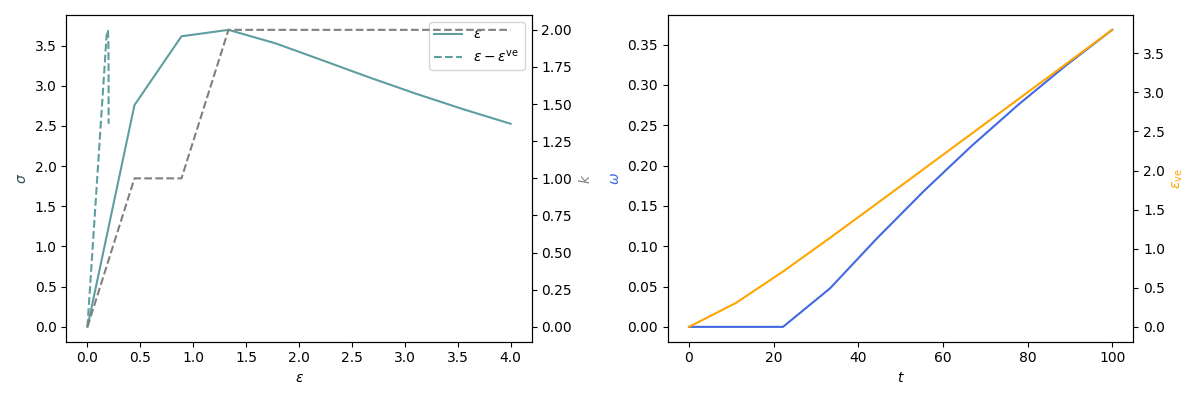

In [6]:
fig, (ax_sig, ax_omega) = plt.subplots(1, 2, figsize=(12, 4))

# Plot stress-strain and iterations-strain curves
ax_iter = ax_sig.twinx()
ax_eps_v = ax_omega.twinx()

ax_sig.plot(eps_t, Sig_t[:,:,0], color='cadetblue', label=r'$\varepsilon$')
ax_sig.plot(eps_t-eps_v_t, Sig_t[:,:,0], ls='dashed', color='cadetblue', label=r'$\varepsilon-\varepsilon^\mathrm{ve}$')
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend()

ax_iter.plot(eps_t, iter_t, ls='dashed', color='gray')
ax_iter.set_ylabel(r'$k$', color='gray')

ax_omega.plot(t_t, omega_t, label='Damage', color='royalblue')
ax_eps_v.plot(t_t, eps_v_t, label='Viscoplastic Strain', color='orange')

ax_omega.set_xlabel(r'$t$')
ax_omega.set_ylabel(r'$\omega$', color='royalblue')
ax_eps_v.set_ylabel(r'$\varepsilon_\mathrm{ve}$', color='orange')

plt.tight_layout()
plt.show()